In [1]:
import numpy as np

In [2]:
def computeExpectedPayoffPerAction(payoffMatrix, policy):
    return np.sum(payoffMatrix * policy, axis=1)

In [3]:
Payoff_1 = np.array([
    [6, 3],
    [3, 4.5]
])

Payoff_2 = np.array([
    [22, 26],
    [22, 18]
])

In [4]:
policy_1 = np.array([0.5, 0.5])
policy_2 = np.array([1/3, 2/3])

In [5]:
computeExpectedPayoffPerAction(Payoff_1, policy_2)

array([4., 4.])

In [6]:
computeExpectedPayoffPerAction(Payoff_2.T, policy_1)

array([22., 22.])

In [7]:
def computePayoffs(pMatrix_1, pMatrix_2, policy_1, policy_2):
    return (computeExpectedPayoffPerAction(pMatrix_1, policy_2), computeExpectedPayoffPerAction(pMatrix_2.T, policy_1))

computePayoffs(Payoff_1, Payoff_2, policy_1, policy_2)

(array([4., 4.]), array([22., 22.]))

In [8]:
def randomPolicy(n):
    policy = np.random.rand(n)
    return policy / np.sum(policy)

In [9]:
def toPolarCoord(p):
    return np.arctan2(p[1], p[0]) * 180 / np.pi, np.linalg.norm(p)

In [10]:
def normalizePayoffNorm(payoffMatrix, payoff):
    maxPayoff = np.linalg.norm(np.max(payoffMatrix, axis=1))
    minPayoff = np.linalg.norm(np.min(payoffMatrix, axis=1))
    return (payoff - minPayoff) / (maxPayoff - minPayoff) 

In [11]:
def offsetPolicy(policy, scale=0.05):
    scale = 100 if np.random.rand()< 0.1 else scale
    offset = np.random.rand(len(policy)) * scale
    return (policy + offset) / np.sum(policy + offset)

In [12]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

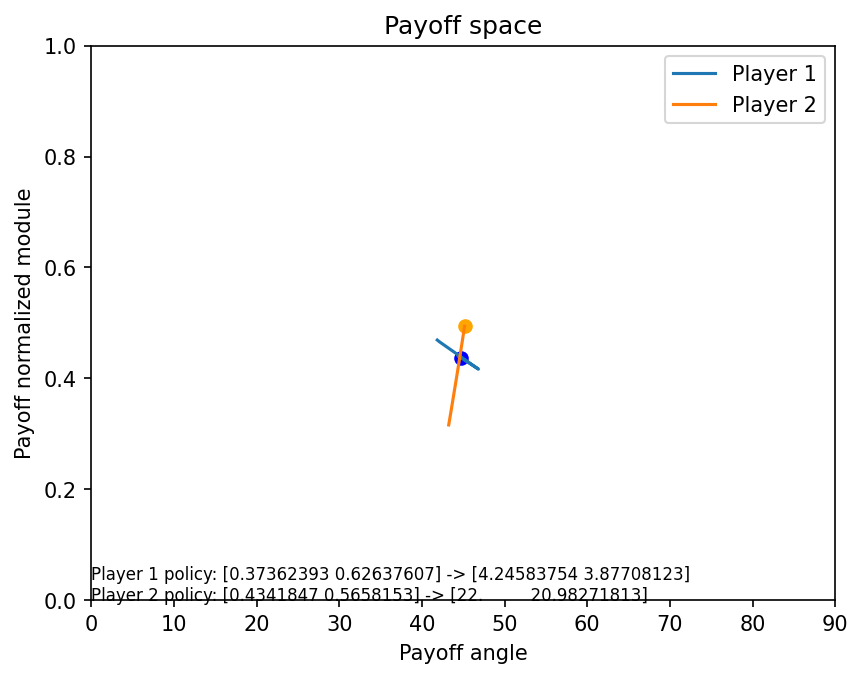

In [13]:
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

trajectory = []
bestAnglesOffset = [90, 90]

policy_1 = randomPolicy(2)
policy_2 = randomPolicy(2)

bestP1, bestP2 = None, None

def animate(t):
    global policy_1, policy_2, trajectory, bestAnglesOffset, bestP1, bestP2

    plt.cla()
    new_policy_1 = offsetPolicy(policy_1)
    new_policy_2 = offsetPolicy(policy_2)

    p1_payoff, p2_payoff = computePayoffs(Payoff_1, Payoff_2, new_policy_1, new_policy_2)
    p1, p2 = toPolarCoord(p1_payoff), toPolarCoord(p2_payoff)
    p1 = (p1[0], normalizePayoffNorm(Payoff_1, p1[1]))
    p2 = (p2[0], normalizePayoffNorm(Payoff_2.T, p2[1]))
    if(np.abs(p1[0] - 45) < bestAnglesOffset[0]):
        policy_1 = new_policy_1
        bestAnglesOffset[0] = np.abs(p1[0] - 45)
        bestP1 = p1

    if(np.abs(p2[0] - 45) < bestAnglesOffset[1]):
        policy_2 = new_policy_2
        bestAnglesOffset[1] = np.abs(p2[0] - 45)
        bestP2 = p2
        
    trajectory.append((bestP1, bestP2))
    plt.plot([p[0][0] for p in trajectory], [p[0][1] for p in trajectory], label='Player 1')
    plt.scatter(bestP1[0], bestP1[1], color='blue')
    plt.plot([p[1][0] for p in trajectory], [p[1][1] for p in trajectory], label='Player 2')
    plt.scatter(bestP2[0], bestP2[1], color='orange')
    plt.xlabel('Payoff angle')
    plt.ylabel('Payoff normalized module')
    plt.legend()
    plt.title('Payoff space')
    plt.text(0, 0, f'Player 1 policy: {policy_1} -> {p1_payoff} \nPlayer 2 policy: {policy_2} -> {p2_payoff}', fontsize=8)
    plt.axis([0, 90, 0, 1])

matplotlib.animation.FuncAnimation(fig, animate, frames=100, interval=100)


In [14]:
policy_1 = randomPolicy(2)
policy_2 = randomPolicy(2)
bestAnglesOffset = [90, 90]
for step in range(10):
    new_policy_1 = offsetPolicy(policy_1)
    new_policy_2 = offsetPolicy(policy_2)

    p1, p2 = computePayoffs(Payoff_1, Payoff_2, new_policy_1, new_policy_2)
    p1, p2 = toPolarCoord(p1), toPolarCoord(p2)
    print(p1, p2, bestAnglesOffset)
    if(np.abs(p1[0] - 45) < bestAnglesOffset[0]):
        policy_1 = new_policy_1
        bestAnglesOffset[0] = np.abs(p1[0] - 45)

    if(np.abs(p2[0] - 45) < bestAnglesOffset[1]):
        policy_2 = new_policy_2
        bestAnglesOffset[1] = np.abs(p2[0] - 45)

    print(f'Player 1 policy: {policy_1} Player 2 policy: {policy_2}')

(51.55660217128554, 5.483992735949043) (40.248731612742986, 28.824229296297226) [90, 90]
Player 1 policy: [0.07794234 0.92205766] Player 2 policy: [0.13654141 0.86345859]
(50.90197056875075, 5.497563107876652) (40.70331496681485, 29.020048122913902) [6.55660217128554, 4.751268387257014]
Player 1 policy: [0.11564999 0.88435001] Player 2 policy: [0.15567777 0.84432223]
(49.810012009533594, 5.521958980588261) (40.833016534214465, 29.07674470122497) [5.901970568750748, 4.296685033185149]
Player 1 policy: [0.12650308 0.87349692] Player 2 policy: [0.18781794 0.81218206]
(48.65374908232854, 5.550236253728361) (41.03889803690254, 29.16750600340746) [4.810012009533594, 4.166983465785535]
Player 1 policy: [0.14381823 0.85618177] Player 2 policy: [0.22217663 0.77782337]
(47.92597839403236, 5.569351004141685) (41.05998543198161, 29.176855517819284) [3.653749082328538, 3.9611019630974624]
Player 1 policy: [0.14559784 0.85440216] Player 2 policy: [0.24398905 0.75601095]
(30.43994454229258, 6.3985306

In [15]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

x= np.linspace(0,10,100)
def animate(t):
    plt.cla()
    plt.plot(x-t,x)
    plt.xlim(0,10)

matplotlib.animation.FuncAnimation(fig, animate, frames=10)